In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns



In [89]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import plotly.offline as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


In [90]:
resturant_data=pd.read_csv("E:\ResturantPredictor\Restaurants_DataSet.csv")
resturant_df=resturant_data.copy()
resturant_df.head(2)

,U_id,Id,Address,Name,Online_Order,Book_Table,Rating,Contact,Location,Restaurant_Type,Cuisines,Approx_Cost(For 2 Persons),Approx_Cost(For 4 Persons),Approx_Cost(For 6 Persons),Approx_Cost(For 8 Persons),Approx_Cost(For 10 Persons),Listed(Type),Listed(City),Category_Type
0,1,1,"10/A, M.A.C.H.S? Main Shahrah-e-Faisal Rd, Moh...",LalQila Restaurant Karachi,Yes,Yes,4.2,021-111525745,Mohammad Ali Society,"Buffet,\nhi-tea",Seafood,3500,7000,10000,14000,18000,\nDinner,Karachi,Friends
1,2,2,"10/A, M.A.C.H.S? Main Shahrah-e-Faisal Rd, Moh...",LalQila Restaurant Karachi,Yes,Yes,4.2,021-111525745,Mohammad Ali Society,"Buffet,\nhi-tea",Continental,3500,7000,10000,14000,18000,Lunch,Karachi,Friends


In [44]:
#Dropping the column "dish_liked", "phone", "url"
resturant_df=resturant_df.drop(['Contact'],axis=1)
#Removing the Duplicates
resturant_df.duplicated().sum()
resturant_df.drop_duplicates(inplace=True)
#Changing the column names
resturant_df = resturant_df.rename(columns={'Approx_Cost(For 2 Persons)': 'cost1', 'Approx_Cost(For 4 Persons)': 'cost2',
                                   'Approx_Cost(For 6 Persons)': 'cost3', 'Approx_Cost(For 8 Persons)': 'cost4', 'Approx_Cost(For 10 Persons)': 'cost5', 'Listed(Type)': 'type', 'Listed(City)': 'city'})
#Changing the cost to string
resturant_df['cost1'] = resturant_df['cost1'].astype(str) 
resturant_df['cost1'] = resturant_df['cost1'].apply(lambda x: x.replace(',','.'))
resturant_df['cost1'] = resturant_df['cost1'].astype(float)
resturant_df['cost2'] = resturant_df['cost2'].astype(str) 
resturant_df['cost2'] = resturant_df['cost2'].apply(lambda x: x.replace(',','.'))
resturant_df['cost2'] = resturant_df['cost2'].astype(float)
resturant_df['cost3'] = resturant_df['cost3'].astype(str)
resturant_df['cost3'] = resturant_df['cost3'].apply(lambda x: x.replace(',', '.'))
resturant_df['cost3'] = resturant_df['cost3'].astype(float)
resturant_df['cost4'] = resturant_df['cost4'].astype(str)
resturant_df['cost4'] = resturant_df['cost4'].apply(
    lambda x: x.replace(',', '.'))
resturant_df['cost4'] = resturant_df['cost4'].astype(float)
resturant_df['cost5'] = resturant_df['cost5'].astype(str)
resturant_df['cost5'] = resturant_df['cost5'].apply(
    lambda x: x.replace(',', '.'))
resturant_df['cost5'] = resturant_df['cost5'].astype(float)


In [45]:
## Computing Mean Rating
from sklearn.preprocessing import MinMaxScaler
restaurants = list(resturant_df['Name'].unique())
resturant_df['Mean Rating'] = 0
for i in range(len(restaurants)):
    resturant_df['Mean Rating'][resturant_df['Name'] == restaurants[i]
                             ] = resturant_df['Rating'][resturant_df['Name'] == restaurants[i]].mean()
#Scaling the mean rating values
scaler = MinMaxScaler(feature_range=(1, 5))
resturant_df[['Mean Rating']] = scaler.fit_transform(
    resturant_df[['Mean Rating']]).round(2)


In [46]:
resturant_df[['U_id','Id','Name','Rating','Mean Rating']].head

<bound method NDFrame.head of     U_id  Id                        Name  Rating  Mean Rating
0      1   1  LalQila Restaurant Karachi     4.2         2.33
1      2   2  LalQila Restaurant Karachi     4.2         2.33
2      3   3  LalQila Restaurant Karachi     4.2         2.33
3      4   1  LalQila Restaurant Karachi     4.2         2.33
4      5   1  LalQila Restaurant Karachi     4.2         2.33
..   ...  ..                         ...     ...          ...
89    90  27                Studio 7teas     4.3         2.67
90    91  28                 Cafe Piyala     4.3         2.67
91    92  28                 Cafe Piyala     4.3         2.67
92    93  29               The Soda shop     4.9         4.67
93    94  30           CO2 The Soda Shop     5.0         5.00

[94 rows x 5 columns]>

Text(0.5, 1.0, 'Top Rated 10 Restaurants')

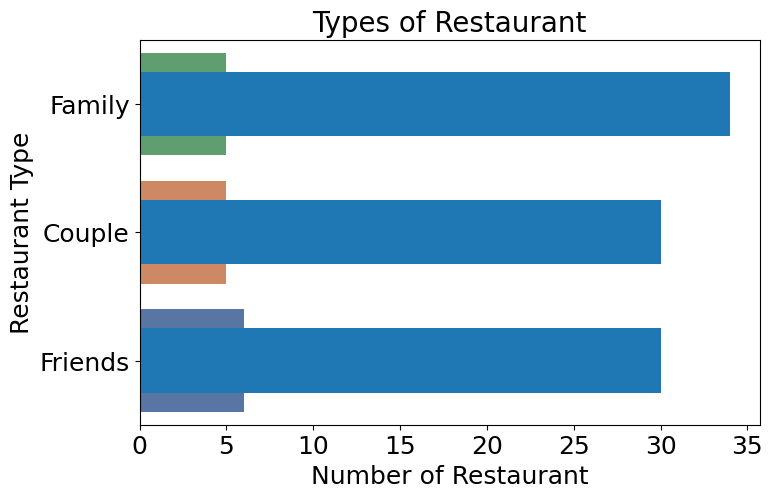

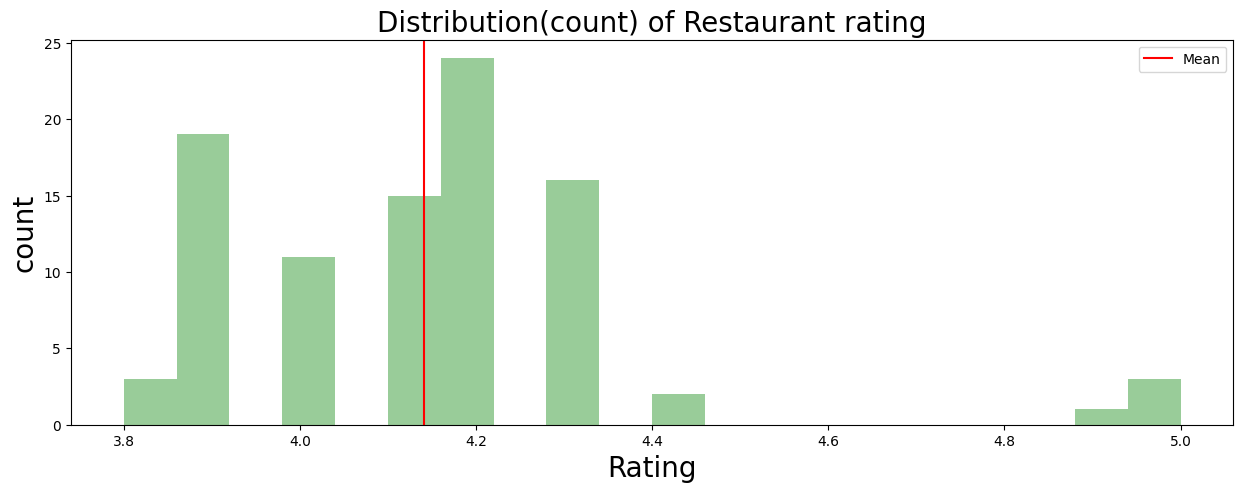

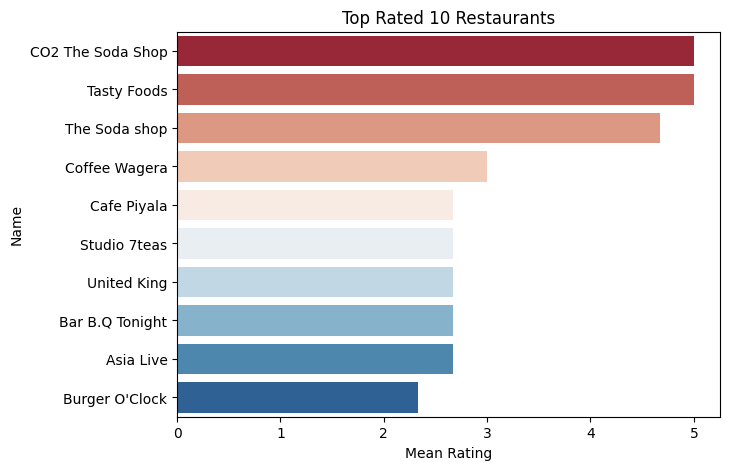

In [47]:
#Most Famous restaurant chains in Banglore
plt.figure(figsize=(8,5))
chains=resturant_df['Name'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants in Karachi")
zplt.xlabel("Number of outlets")
#Types of Restaurant
counts = resturant_df["Category_Type"].value_counts()[:10] 
p = counts.sort_values().plot.barh(figsize=(8,5), fontsize=18) 
p.set_xlabel("Number of Restaurant",fontsize=18) 
p.set_ylabel("Restaurant Type",fontsize=18)
p.set_title("Types of Restaurant", fontsize=20)
#Distribution of Restaurant Rating 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.distplot(resturant_df.Rating,kde=False,color = 'g',ax =ax,bins=20)
ax.axvline(resturant_df.Rating.mean(), 0, 1, color='r', label='Mean')
ax.legend()
ax.set_ylabel('count',size=20)
ax.set_xlabel('Rating',size=20)
ax.set_title('Distribution(count) of Restaurant rating',size=20)
# Top 10 Rated Restaurants
df_rating = resturant_df.drop_duplicates(subset='Name')
df_rating = df_rating.sort_values(by='Mean Rating', ascending=False).head(10)
plt.figure(figsize=(7,5))
sns.barplot(data=df_rating, x='Mean Rating', y='Name', palette='RdBu')
plt.title('Top Rated 10 Restaurants')

In [48]:
def get_top_words(column, top_nu_of_words, nu_of_word):

    vec = CountVectorizer(ngram_range=nu_of_word, stop_words='english')

    bag_of_words = vec.fit_transform(column)

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]

    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    return words_freq[:top_nu_of_words]


Text(0.5, 1.0, 'Word Couple Frequency for Cuisines')

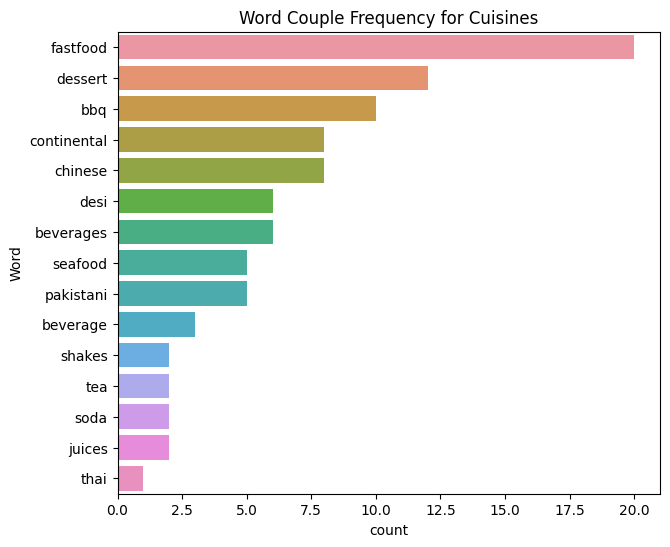

In [91]:
# Top 15 two word frequencies for Cuisines
lst = get_top_words(resturant_df['Cuisines'], 15, (1, 1))
df_words = pd.DataFrame(lst, columns=['Word', 'count'])
plt.figure(figsize=(7, 6))
sns.barplot(data=df_words, x='count', y='Word')
plt.title('Word Couple Frequency for Cuisines')

In [92]:
df_rating.head(2)

,U_id,Id,Address,Name,Online_Order,Book_Table,Rating,Location,Restaurant_Type,Cuisines,cost1,cost2,cost3,cost4,cost5,type,city,Category_Type,Mean Rating
93,94,30,"Shop 19, Crown Gardens, Main University Rd, Bl...",CO2 The Soda Shop,Yes,No,5.0,"Main University Rd, Block 4 Gulistan-e-Johar",Refreshing Point,Soda and Juices,200.0,400.0,600.0,800.0,1000.0,Drink Shop,Karachi,Family,5.0
64,65,20,"Street #2, Block H North Nazimabad Town, Karac...",Tasty Foods,No,No,5.0,Block H North Nazimabad Town,"Lunch,\nQuick bites",FastFood,950.0,1800.0,2750.0,3599.0,4550.0,Lunch,Karachi,Couple,5.0


In [93]:
Id = resturant_df.Id.nunique()
U_id =resturant_df.U_id.nunique()

In [99]:
import tensorflow as tf
input__ = tf.layers.Input(shape=[1])
embed = tf.layers.Embedding(Id + 1, 15)(input__)
out = tf.layers.Flatten()(embed)

#user input network
input_ = tf.layers.Input(shape=[1])
embed_ = tf.layers.Embedding(U_id+ 1, 15)(input_)
_out = tf.layers.Flatten()(embed_)

conc_layer = tf.layers.Concatenate()([out, _out])
x = tf.layers.Dense(128, activation='relu')(conc_layer)
x_out = x = tf.layers.Dense(1, activation='relu')(x)
model = tf.Model([input__, input_], x_out)


AttributeError: module 'tensorflow' has no attribute 'layers'

In [ ]:
opt = tf.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error')
model.summary()


NameError: name 'tf' is not defined

In [ ]:
hist = model.fit([X_train.Id, X_train.U_id], X_train.Rating,
                 batch_size=64,
                 epochs=5,
                 verbose=1,
                 validation_data=([X_test.Id, X_test.U_id], X_test.Rating))


NameError: name 'model' is not defined

In [ ]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(train_loss, color='r', label='Train Loss')
plt.plot(val_loss, color='b', label='Validation Loss')
plt.title("Train and Validation Loss Curve")
plt.legend()
plt.show()


NameError: name 'hist' is not defined

In [ ]:
#save the model
model.save('Resturant.model', save_format="h5")


In [ ]:
resturant_df.head(2)

,U_id,Id,Address,Name,Online_Order,Book_Table,Rating,Location,Restaurant_Type,Cuisines,cost1,cost2,cost3,cost4,cost5,type,city,Category_Type,Mean Rating
0,1,1,"10/A, M.A.C.H.S? Main Shahrah-e-Faisal Rd, Moh...",LalQila Restaurant Karachi,Yes,Yes,4.2,Mohammad Ali Society,"Buffet,\nhi-tea",Seafood,3500.0,7000.0,10000.0,14000.0,18000.0,\nDinner,Karachi,Friends,2.33
1,2,2,"10/A, M.A.C.H.S? Main Shahrah-e-Faisal Rd, Moh...",LalQila Restaurant Karachi,Yes,Yes,4.2,Mohammad Ali Society,"Buffet,\nhi-tea",Continental,3500.0,7000.0,10000.0,14000.0,18000.0,Lunch,Karachi,Friends,2.33


In [ ]:
resturant_df.set_index('Cuisines', inplace=True)
indices = pd.Series(resturant_df.index)

# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(resturant_df['Category_Type'])

cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)


In [ ]:

print("Cuisines Category you want to eat...!!\n")
cuisines_=input()
print(cuisines_)
print("Your Budget Please..!!\n")
budget=int(input())
print(budget)
print("Total Persons..!!\n")
Num=int(input())
print(Num)




Cuisines Category you want to eat...!!

Seafood
Your Budget Please..!!

3000
Total Persons..!!

2


In [ ]:
def recommend_(cuisines, cosine_similarities=cosine_similarities):

    recommend_restaurant = []

    # Find the index of the hotel entered
    idx = indices[indices == cuisines].index[0]

    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(
        cosine_similarities[idx]).sort_values(ascending=False)

    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)

    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(resturant_df.index)[each])

    if Num <= 2:
        cost = resturant_df["cost1"]
        # Creating the new data set to show similar restaurants
        df_new = pd.DataFrame(
            columns=['Name', 'Mean Rating', 'cost1'])

        # Create the top 30 similar restaurants with some of their columns
        for each in recommend_restaurant:
            df_new = df_new.append(pd.DataFrame(
                resturant_df[['Name', 'Mean Rating', 'cost1']][resturant_df.index == each].sample()))

        # Drop the same named restaurants and sort only the top 10 by the highest rating
        df_new = df_new.drop_duplicates(
            subset=['Name', 'Mean Rating', 'cost1'], keep=False)

    elif Num <= 4:
        cost = resturant_df["cost2"]
        # Creating the new data set to show similar restaurants
        df_new = pd.DataFrame(columns=['Name', 'Mean Rating', 'cost2'])

        # Create the top 30 similar restaurants with some of their columns
        for each in recommend_restaurant:
            df_new = df_new.append(pd.DataFrame(
                resturant_df[['Name', 'Mean Rating','cost2']][resturant_df.index == each].sample()))

        # Drop the same named restaurants and sort only the top 10 by the highest rating
        df_new = df_new.drop_duplicates(
            subset=['Name', 'Mean Rating','cost2'], keep=False)
        
    elif Num <= 6:
        cost = resturant_df["cost3"]
        # Creating the new data set to show similar restaurants
        df_new = pd.DataFrame(columns=['Name', 'Mean Rating', 'cost3'])

        # Create the top 30 similar restaurants with some of their columns
        for each in recommend_restaurant:
            df_new = df_new.append(pd.DataFrame(
                resturant_df[['Name', 'Mean Rating', 'cost3']][resturant_df.index == each].sample()))

        # Drop the same named restaurants and sort only the top 10 by the highest rating
        df_new = df_new.drop_duplicates(
            subset=['Name', 'Mean Rating', 'cost3'], keep=False)
        
    elif Num <= 8:
        cost = resturant_df["cost4"]
        # Creating the new data set to show similar restaurants
        df_new = pd.DataFrame(columns=['Name', 'Mean Rating', 'cost4'])

        # Create the top 30 similar restaurants with some of their columns
        for each in recommend_restaurant:
            df_new = df_new.append(pd.DataFrame(
                resturant_df[['Name', 'Mean Rating', 'cost4']][resturant_df.index == each].sample()))

        # Drop the same named restaurants and sort only the top 10 by the highest rating
        df_new = df_new.drop_duplicates(
            subset=['Name', 'Mean Rating', 'cost4'], keep=False)

    elif Num >= 9:
        cost = resturant_df["cost5"]
        # Creating the new data set to show similar restaurants
        df_new = pd.DataFrame(
            columns=['Name', 'Mean Rating', 'cost5'])

        # Create the top 30 similar restaurants with some of their columns
        for each in recommend_restaurant:
            df_new = df_new.append(pd.DataFrame(
                resturant_df[['Name', 'Mean Rating', 'cost5']][resturant_df.index == each].sample()))

        # Drop the same named restaurants and sort only the top 10 by the highest rating
        df_new = df_new.drop_duplicates(
            subset=['Name', 'Mean Rating', 'cost5'], keep=False)


    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)

    print('TOP %s RESTAURANTS HAVING %s WITH SIMILAR REVIEWS: ' %
          (str(len(df_new)), cuisines))

    return df_new

In [ ]:
recommend_(cuisines_)

TOP 6 RESTAURANTS HAVING Seafood WITH SIMILAR REVIEWS: 


,Name,Mean Rating,cost1
Dessert,Asia Live,2.67,5600.0
BBQ,Studio 7teas,2.67,1850.0
Pakistani,SKY BBQ,2.33,2650.0
FastFood,FLOC - for the love of coffee,2.00,2250.0
Dessert,Chaupal Buffet,1.33,2000.0
FastFood,Cafe Bistrovia,1.33,1300.0


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [115]:
import pickle
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import hvplot.pandas
from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer
from io import StringIO


dataset = pd.read_csv('E:\ResturantPredictor\Restaurants_DataSet.csv')

label_encoder = preprocessing.LabelEncoder()

X =[dataset['Id']]
y = [dataset['Rating']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20)
# importing libraries
warnings.filterwarnings("ignore")
# Decision Tree
modelDT = tree.DecisionTreeClassifier()
resultDT = modelDT.fit(X_train, y_train)
prediction_test = modelDT.predict(X_test)
accuracyDT = metrics.accuracy_score(y_test, prediction_test)
print()
print ("Model Accuracy (Decision Tree):" "\n", accuracyDT)

ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.